<p><font size="6"><b>05 - Pandas: "Group by" operations</b></font></p>


> *© 2025, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Some 'theory': the groupby operation (split-apply-combine)

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [3]:
df['data'].sum()

np.int64(90)

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [4]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="../img/pandas/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [5]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [6]:
df.groupby('key').aggregate("sum")

,data
key,
A,15
B,30
C,45


And many more methods are available.

In [7]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

# Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [8]:
df = pd.read_csv("data/titanic.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

__EXERCISE__

Using groupby(), calculate the average age for each sex.

</div>

In [10]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

__EXERCISE__

Calculate the average survival ratio for all passengers.

</div>

In [11]:
# df['Survived'].sum() / len(df['Survived'])
df['Survived'].mean()

np.float64(0.3838383838383838)

<div class="alert alert-success">

__EXERCISE__

Calculate this survival ratio for all passengers younger than 25 

<details><summary>Hints</summary>

- remember the concept of filtering and boolean indexing using a mask of True/False records?

</details>  

</div>

In [12]:
df25 = df[df['Age'] < 25]
df25['Survived'].mean()

np.float64(0.4244604316546763)

<div class="alert alert-success">

__EXERCISE__

What is the difference in the survival ratio between the sexes?

</div>

In [13]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">

__EXERCISE__

Make a bar plot of the survival ratio for the different classes ('Pclass' column).

</div>

<Axes: xlabel='Pclass'>

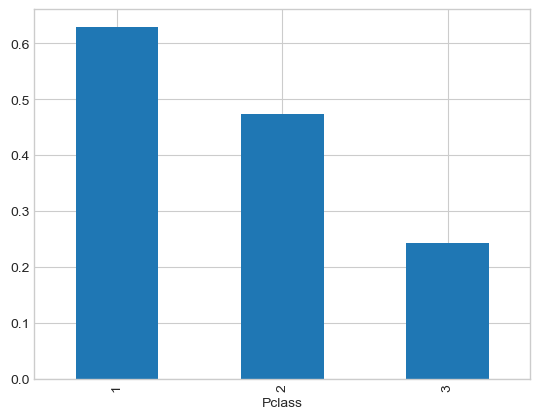

In [14]:
df.groupby('Pclass')['Survived'].mean().plot.bar() #and what if you would compare the total number of survivors?

<div class="alert alert-success">

__EXERCISE__

Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is divided in separate classes using the `pd.cut()` function as provided below.

</div>

In [15]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

<Axes: xlabel='AgeClass'>

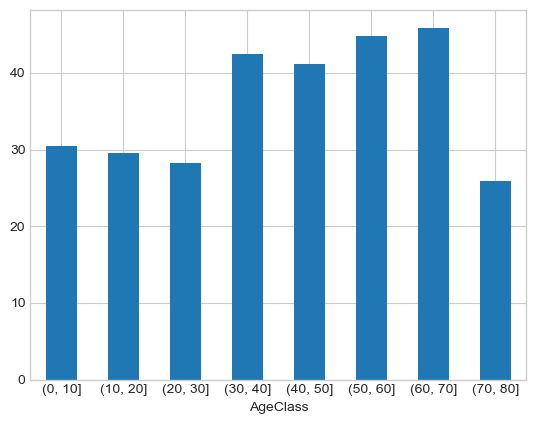

In [16]:
df.groupby('AgeClass', observed=False)['Fare'].mean().plot.bar(rot=0)

If you are ready, more groupby exercises can be found below.

# Some more theory

## Specifying the grouper

In the previous example and exercises, we always grouped by a single column by passing its name. But, a column name is not the only value you can pass as the grouper in `df.groupby(grouper)`. Other possibilities for `grouper` are:

- a list of strings (to group by multiple columns)
- a Series (similar to a string indicating a column in df) or array
- function (to be applied on the index)
- levels=[], names of levels in a MultiIndex

In [17]:
df.groupby(df['Age'] < 18)['Survived'].mean()

Age
False    0.361183
True     0.539823
Name: Survived, dtype: float64

In [18]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## The size of groups - value counts

Often you want to know how many elements there are in a certain group (or in other words: the number of occurences of the different values from a column).

To get the size of the groups, we can use `size`:

In [19]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [20]:
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

Another way to obtain such counts, is to use the Series `value_counts` method (which additionally sorts from most to least occurring group):

In [21]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# [OPTIONAL] Additional exercises using the movie data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so credit to him!) and the datasets he prepared for that. You can download these data from here: [titles.csv](https://course-python-data.s3.eu-central-1.amazonaws.com/titles.csv) and [cast.csv](https://course-python-data.s3.eu-central-1.amazonaws.com/cast.csv) and put them in the `/notebooks/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the movie
- year: year it was released
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [22]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


`titles` dataset:

* title: title of the movie
* year: year of release

In [23]:
titles = pd.read_csv('data/titles.csv')
# some titles are missing and this gives issues filtering with this column -> fill with empty string
titles['title'] = titles['title'].fillna("")
titles.head()

,title,year
0,The Last Mimzy,2007
1,The Fighting Sheriff,1925
2,Giftes - nej tak!,1936
3,Sourdough,1981
4,A Time to Kill,1955


<div class="alert alert-success">

__EXERCISE__

Using `groupby()`, plot the number of films that have been released each decade in the history of cinema.

</div>

In [24]:
titles['decade'] = titles['year'] // 10 * 10

<Axes: xlabel='decade'>

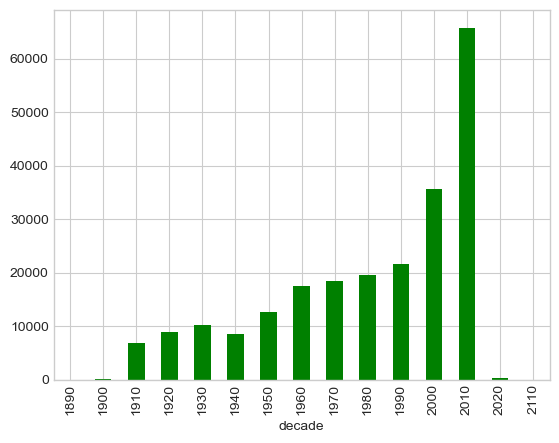

In [25]:
titles.groupby('decade').size().plot.bar(color='green')

<div class="alert alert-success">

__EXERCISE__

Use `groupby()` to plot the number of 'Hamlet' movies made each decade.

</div>

<Axes: xlabel='decade'>

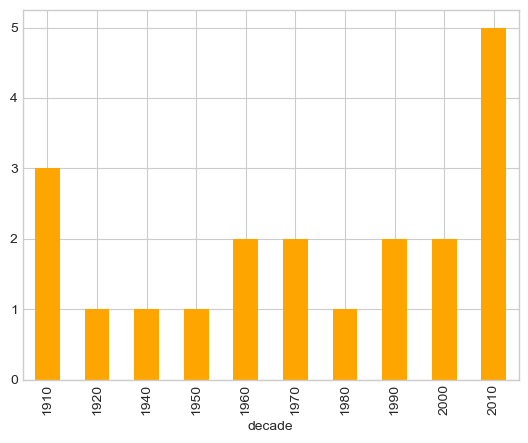

In [26]:
titles['decade'] = titles['year'] // 10 * 10
hamlet = titles[titles['title'] == 'Hamlet']
hamlet.groupby('decade').size().plot.bar(color="orange")

<div class="alert alert-success">

__EXERCISE__

For each decade, plot all movies of which the title contains "Hamlet".

</div>

<Axes: xlabel='decade'>

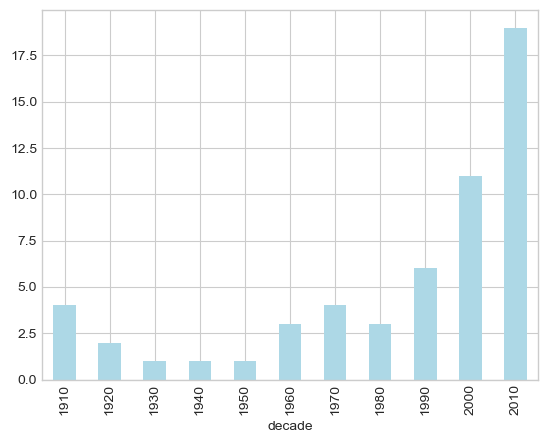

In [27]:
titles['decade'] = titles['year'] // 10 * 10
hamlet = titles[titles['title'].str.contains('Hamlet')]
hamlet.groupby('decade').size().plot.bar(color="lightblue")

<div class="alert alert-success">

__EXERCISE__

List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

</div>

In [28]:
cast1990 = cast[cast['year'] >= 1990]
cast1990 = cast1990[cast1990['n'] == 1]
cast1990.groupby('name').size().nlargest(10)

name
Mohanlal              138
Mammootty             127
Akshay Kumar           96
Jayaram                80
Ajay Devgn             75
Andy Lau               72
Dileep (III)           72
Amitabh Bachchan       66
Nagarjuna Akkineni     65
Govinda                62
dtype: int64

In [29]:
cast1990['name'].value_counts().head(10)

name
Mohanlal              138
Mammootty             127
Akshay Kumar           96
Jayaram                80
Ajay Devgn             75
Andy Lau               72
Dileep (III)           72
Amitabh Bachchan       66
Nagarjuna Akkineni     65
Govinda                62
Name: count, dtype: int64

<div class="alert alert-success">

__EXERCISE__

In a previous exercise, the number of 'Hamlet' films released each decade was checked. Not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet' and an overview of the titles that start with 'Hamlet',  each time providing the amount of occurrences in the data set for each of the movies.

</div>

In [30]:
hamlets = titles[titles['title'].str.contains('Hamlet')]
hamlets['title'].value_counts()

title
Hamlet                                     20
Hamlet (II)                                 4
Han, hun og Hamlet                          2
National Theatre Live: Hamlet               1
Hamlet, Son of a Kingpin                    1
Hamlet's Ghost                              1
Fuck Hamlet                                 1
Kitchen Hamlet                              1
A Sagebrush Hamlet                          1
The Tragedy of Hamlet Prince of Denmark     1
Predstava 'Hamleta' u Mrdusi Donjoj         1
Intikam Melegi/Kadin Hamlet                 1
Royal Shakespeare Company: Hamlet           1
Hamlet Unbound                              1
Dogg's Hamlet, Cahoot's Macbeth             1
Green Eggs and Hamlet                       1
Harry, Hamlet and I                         1
Zombie Hamlet                               1
Hamlet 2                                    1
Hamlet, Prince of Denmark                   1
H for Hamlet                                1
Hamlet: Prince of Denmark   

In [31]:
hamlets = titles[titles['title'].str.startswith('Hamlet')]
hamlets['title'].value_counts()

title
Hamlet                           20
Hamlet (II)                       4
Hamlet, Son of a Kingpin          1
Hamlet's Ghost                    1
Hamlet Unbound                    1
Hamlet 2                          1
Hamlet, Prince of Denmark         1
Hamlet: Prince of Denmark         1
Hamlet A.D.D.                     1
Hamlet X                          1
Hamlet the Vampire Slayer         1
Hamlet: The Fall of a Sparrow     1
Hamlet liikemaailmassa            1
Hamlet/Horatio                    1
Hamlet Demonstration              1
Hamlet in the Hamptons            1
Hamlet in the Golden Vale         1
Hamlet (III)                      1
Name: count, dtype: int64

<div class="alert alert-success">

__EXERCISE__

List the 10 movie titles with the longest name.

</div>

In [32]:
title_longest = titles['title'].str.len().nlargest(10)
title_longest

200553    208
33459     116
147211    114
44238     111
70362     104
99297     104
165851    101
48864      99
23066      97
118982     97
Name: title, dtype: int64

In [33]:
pd.options.display.max_colwidth = 210
titles.loc[title_longest.index]

,title,year,decade
200553,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil Mutant Hellbound Flesh Eating Crawling Alien Zombified Subhumanoid Living Dead, Part 5",2011,2010
33459,Maverick and Ariel's First Ever Ever Movie Hollywood or Else... (Ang pinakamahabang title ng movie sa balat ng lupa),2010,2010
147211,The Fable of the Kid Who Shifted His Ideals to Golf and Finally Became a Baseball Fan and Took the Only Known Cure,1916,1910
44238,"Brigitte, Laura, Ursula, Monica, Raquel, Litz, Florinda, Barbara, Claudia, e Sofia le chiamo tutte... anima mia",1974,1970
70362,Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes,1965,1960
99297,"Film d'amore e d'anarchia, ovvero 'stamattina alle 10 in via dei Fiori nella nota casa di tolleranza...'",1973,1970
165851,Ontologica! or a Brief Explanation of Absolutely Everything that is Known about Absolutely Everything,2012,2010
48864,The Official Motion Pictures of the Heavyweight Boxing Contest Between Gene Tunney and Jack Dempsey,1927,1920
23066,"Learning from the Legends: Mendelssohn Violin Concerto in E Minor, Op. 64 Featuring Lara St. John",2014,2010
118982,"Learning from the Legends: Bruch Violin Concerto No. 1 in G Minor, Op. 26 featuring Lara St. John",2014,2010


<div class="alert alert-success">

__EXERCISE__

How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

</div>

In [34]:
cast1950 = cast[cast['year'] // 10 == 195]
cast1950 = cast1950[cast1950['n'] == 1]
cast1950.groupby(['year', 'type']).size()

year  type   
1950  actor      622
      actress    287
1951  actor      640
      actress    283
1952  actor      605
      actress    300
1953  actor      648
      actress    305
1954  actor      616
      actress    311
1955  actor      634
      actress    281
1956  actor      651
      actress    304
1957  actor      700
      actress    303
1958  actor      674
      actress    292
1959  actor      692
      actress    319
dtype: int64

<div class="alert alert-success">

__EXERCISE__

What are the 11 most common character names in movie history?

</div>

In [35]:
cast.character.value_counts().head(11)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Minor Role      6203
Name: count, dtype: int64

<div class="alert alert-success">

__EXERCISE__

Plot how many roles Brad Pitt has played in each year of his career.

</div>

<Axes: xlabel='year'>

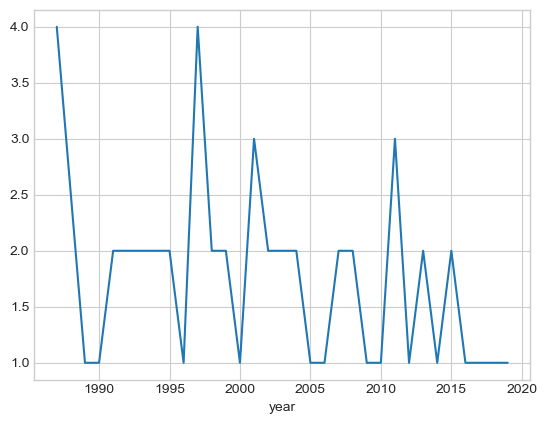

In [36]:
cast[cast.name == 'Brad Pitt'].year.value_counts().sort_index().plot()

<div class="alert alert-success">

__EXERCISE__

What are the 10 most occurring movie titles that start with the words 'The Life'?
      
</div>

In [37]:
titles[titles['title'].str.startswith('The Life')]['title'].value_counts().head(10)

title
The Life of the Party                                         4
The Life of Riley                                             3
The Life                                                      2
The Life Coach                                                2
The Life of Juanita Castro                                    1
The Life of Robert Burns                                      1
The Life Story of Baal                                        1
The Life Story of John Lee, or The Man They Could Not Hang    1
The Life: Sex, Drugs & Violence                               1
The Life Exchange                                             1
Name: count, dtype: int64

<div class="alert alert-success">

__EXERCISE__

Which actors or actresses were most active in the year 2010 (i.e. appeared in the most movies)?

</div>

In [38]:
cast[cast.year == 2010].name.value_counts().head(10)

name
Brahmanandam            22
Suraaj Venjarammoodu    21
Jagathi Sreekumar       20
Chris (II) Eddy         20
Matt Simpson Siegel     17
Kyle Rea                15
Danny Trejo             15
Salim Kumar             15
Ben (II) Bishop         14
Joe Estevez             13
Name: count, dtype: int64

<div class="alert alert-success">

__EXERCISE__

Determine how many roles are listed for each of 'The Pink Panther' movies.

</div>

In [39]:
pink = cast[cast['title'] == 'The Pink Panther']
pink.groupby(['year'])[['n']].max()

,n
year,
1963,15.0
2006,50.0


<div class="alert alert-success">

__EXERCISE__

List, in order by year, each of the movies in which 'Frank Oz' has played more than 1 role.

</div>

In [40]:
oz = cast[cast['name'] == 'Frank Oz']
oz_roles = oz.groupby(['year', 'title']).size()
oz_roles[oz_roles > 1]

year  title                               
1979  The Muppet Movie                        8
1981  The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

<div class="alert alert-success">

__EXERCISE__

List each of the characters that Frank Oz has portrayed at least twice.
      
</div>

In [41]:
oz = cast[cast['name'] == 'Frank Oz']
oz_roles = oz.groupby(['character']).size()
oz_roles[oz_roles > 1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Miss Piggy        5
Animal            6
Yoda              6
dtype: int64

<div class="alert alert-success">

__EXERCISE__

Add a new column to the `cast` DataFrame that indicates the number of roles for each movie. 
    
<details><summary>Hints</summary>

- [Transformation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation) returns an object that is indexed the same (same size) as the one being grouped.

</details>  
    

</div>

In [42]:
cast['n_total'] = cast.groupby(['title', 'year'])['n'].transform('size') # transform will return an element for each row, so the size value is given to the whole group
cast.head()

,title,year,name,type,character,n,n_total
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,32.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,24.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,122.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,78.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,261.0


<div class="alert alert-success">

__EXERCISE__

Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade.

<details><summary>Hints</summary>

- You can do a groupby twice in two steps, first calculating the numbers, and secondly, the ratios.

</details>  

</div>

In [43]:
leading = cast[cast['n'] == 1]
sums_decade = leading.groupby([cast['year'] // 10 * 10, 'type']).size()
sums_decade

year  type   
1900  actor          5
      actress        1
1910  actor       2429
      actress     2763
1920  actor       4538
      actress     3061
1930  actor       6130
      actress     2877
1940  actor       5195
      actress     2230
1950  actor       6482
      actress     2985
1960  actor       7896
      actress     3331
1970  actor       8387
      actress     3375
1980  actor       8813
      actress     3198
1990  actor      10338
      actress     3939
2000  actor      16895
      actress     6698
2010  actor      20241
      actress     9053
2020  actor          4
dtype: int64

In [44]:
#sums_decade.groupby(level='year').transform(lambda x: x / x.sum())
ratios_decade = sums_decade / sums_decade.groupby(level='year').transform('sum')
ratios_decade

year  type   
1900  actor      0.833333
      actress    0.166667
1910  actor      0.467835
      actress    0.532165
1920  actor      0.597184
      actress    0.402816
1930  actor      0.680582
      actress    0.319418
1940  actor      0.699663
      actress    0.300337
1950  actor      0.684694
      actress    0.315306
1960  actor      0.703305
      actress    0.296695
1970  actor      0.713059
      actress    0.286941
1980  actor      0.733744
      actress    0.266256
1990  actor      0.724102
      actress    0.275898
2000  actor      0.716102
      actress    0.283898
2010  actor      0.690961
      actress    0.309039
2020  actor      1.000000
dtype: float64

<Axes: xlabel='year'>

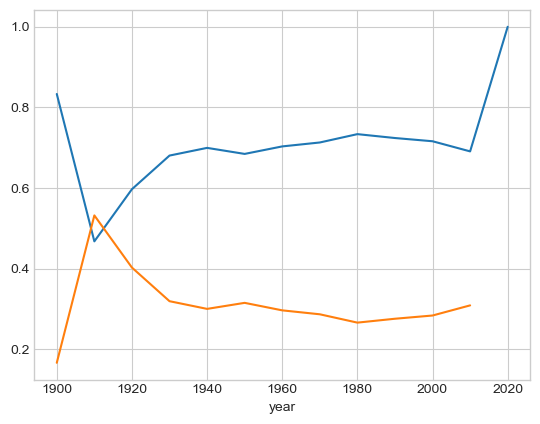

In [45]:
ratios_decade[:, 'actor'].plot()
ratios_decade[:, 'actress'].plot()

<div class="alert alert-success">

__EXERCISE__

In which years the most films were released?
      
</div>

In [46]:
t = titles
t.year.value_counts().head(3)

year
2017    9888
2016    8198
2015    7564
Name: count, dtype: int64

<div class="alert alert-success">

__EXERCISE__

How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?

</div>

In [47]:
cast1950 = cast[cast['year'] // 10 == 195]
cast1950 = cast1950[cast1950['n'] == 1]
cast1950['type'].value_counts()

type
actor      6482
actress    2985
Name: count, dtype: int64

In [48]:
cast2000 = cast[cast['year'] // 10 == 200]
cast2000 = cast2000[cast2000['n'] == 1]
cast2000['type'].value_counts()

type
actor      16895
actress     6698
Name: count, dtype: int64